# Scatter Plot (산점도 그래프)

## #01. Scatter Plot 개요

두 변수 간의 영향력을 보여주기 위해 가로 축과 세로 축에 데이터 포인트를 그리는 데 사용된다.

마커들이 오밀조밀 뭉쳐 있으면 두 변수는 서로 관련성 정도가 높고 흩어져 있으면 관련성이 낮다.

이러한 관계를 상관관계라고 한다.

> 추론통계의 상관분석에서 좀 더 자세히 다룹니다.

### [1] Scatter Plot 유형

<p align="center"><img src="res/scatter1.png" width="75%" /></p>

### [2] Scatter Plot의 해석

아래의 그래프에서 SAT에 응시한 학생 비율이 높을수록 수학 평균 점수는 낮아지는 경향이 있다고 볼 수 있다.

<p align="center"><img src="res/scatter2.png" width="50%" /></p>

## #02. 준비작업

### [1] 패키지 참조

In [24]:
import sys
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt

### [2] 데이터 가져오기

기온에 따른 아이스크림 판매량을 기록한 가상의 데이터

In [25]:
origin = read_excel("https://data.hossam.kr/pydata/icecream.xlsx")
origin.to_excel('./res/icecream.xlsx')
origin

,기온,판매량
0,23,431
1,36,593
2,30,512
3,25,474
4,26,476
5,31,523
6,29,491
7,32,526
8,33,550
9,24,456


### [3] 그래프 초기화

In [26]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.unicode_minus"] = False

## #03. 산점도 그래프 그리기

### [1] 그래프 기본 구성

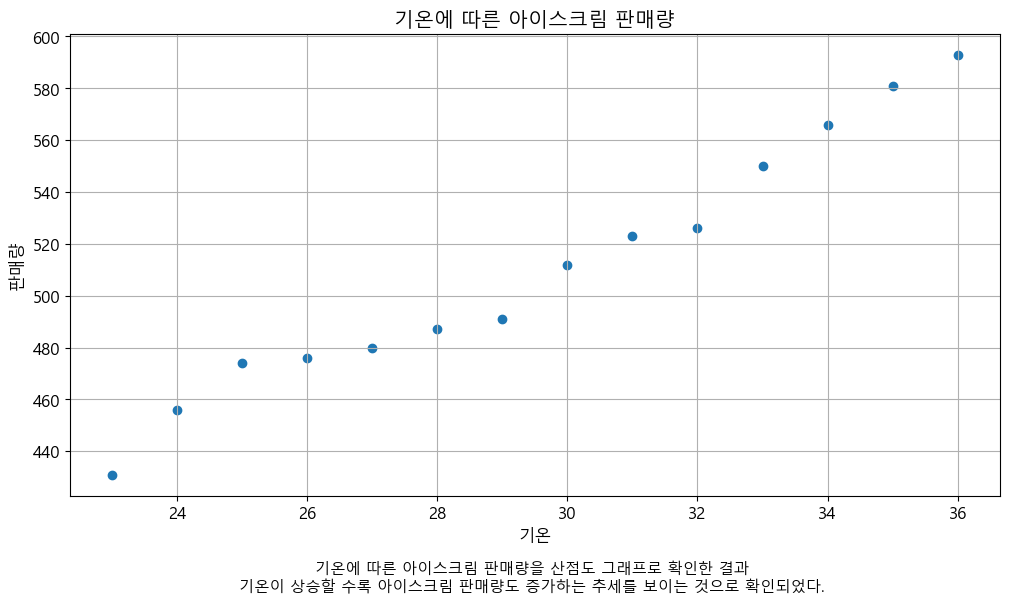

In [27]:
plt.figure()
plt.scatter(origin['기온'], origin['판매량']) # x,y
plt.title("기온에 따른 아이스크림 판매량")
plt.xlabel("기온")
plt.ylabel("판매량")
plt.grid()

txt = """기온에 따른 아이스크림 판매량을 산점도 그래프로 확인한 결과
기온이 상승할 수록 아이스크림 판매량도 증가하는 추세를 보이는 것으로 확인되었다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11})

plt.show()
plt.close()

## #04. 추세선 그리기

주어진 데이터의 일반적인 경향이나 패턴을 나타내는 선

추세선은 주로 선형 회귀 분석을 통해 계산되며 이를 통해 데이터 간의 관계를 파악하고 예측 모델을 개발하는 데 도움이 된다.

일반적으로 추세선을 그리기 위해서는 `scipy`나 `sklearn` 패키지를 통해 선형회귀 모델을 구현하여 회귀식을 도출해야 하지만 간단한 선형회귀의 경우 `numpy`를 통해서도 분석 모델을 도출할 수 있다.

### [1] 가중치와 편향 구하기 

```python
계수, 상수항 = np.polyfit(x, y, 차수)
```

통계학에서는 계수(기울기)를 가중치, 상수항(절편)를 편향이라고 하지만 numpy는 수학적 기능을 구현하고 있는 패키지이므로 numpy에서는 상수항과 계수라고 표현한다.

In [28]:
z = np.polyfit(origin['기온'], origin['판매량'], 1)
print("계수:", z[0])
print("상수항:", z[1])

계수: 11.397802197802186
상수항: 174.19340659340727


### [2] 회귀 분석 모형

#### (1) 모형 확인

상수항과 계수를 활용하여 $y=ax+b$에 해당하는 방정식을 확인한다.

In [29]:
print(f"f(x) = {z[0]} * x + {z[1]}")

f(x) = 11.397802197802186 * x + 174.19340659340727


#### (2) 분석 모형 생성

$y=ax+b$에 해당하는 방정식 객체를 생성한다.

In [30]:
f = np.poly1d(z) # 숫자는 몇차 방정식이냐에 따라 다르다.
f

poly1d([ 11.3978022 , 174.19340659])

#### (3) 분석모형을 활용한 판매량 예측

방정식 $f(x)$에 $x$값을 전달하면 그에 대한 결과를 확인할 수 있다.

In [31]:
x = 40

print(f"기온이 {x}일 경우 아이스크림 판매량은 {f(x)}로 예상됩니다." )

기온이 40일 경우 아이스크림 판매량은 630.1054945054947로 예상됩니다.


#### (4) 전체 데이터에 대한 예측값 확인

In [32]:
x = origin['기온']
y = f(x)
y

array([436.34285714, 584.51428571, 516.12747253, 459.13846154,
       470.53626374, 527.52527473, 504.72967033, 538.92307692,
       550.32087912, 447.74065934, 561.71868132, 573.11648352,
       481.93406593, 493.33186813])

### [3] 추세선을 포함하는 산점도 그래프

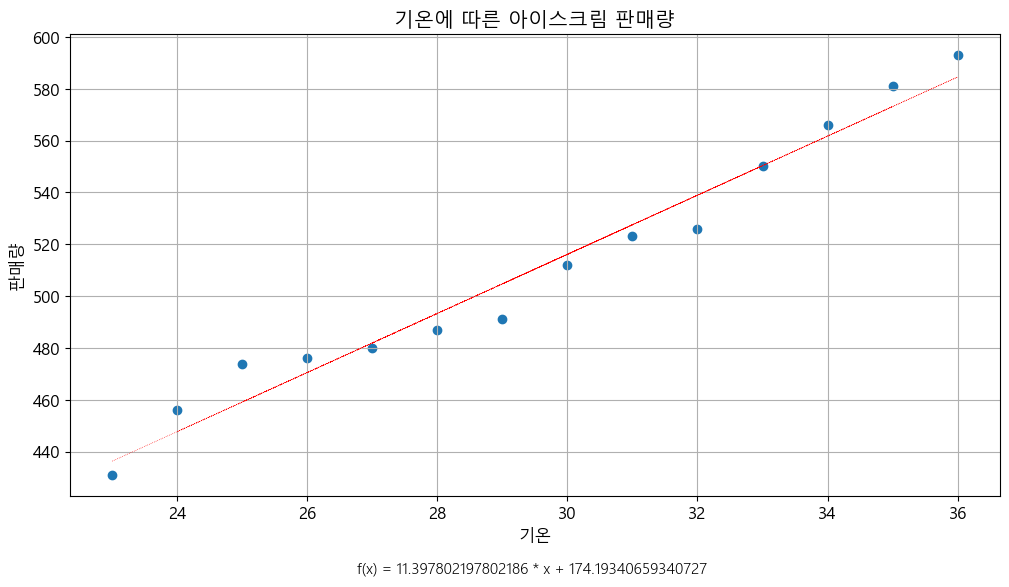

In [33]:
plt.figure()
plt.scatter(origin['기온'], origin['판매량'])
plt.plot(x, y, color="#ff0000", linewidth=0.5, linestyle=":")
plt.title("기온에 따른 아이스크림 판매량")
plt.xlabel("기온")
plt.ylabel("판매량")
plt.grid()

txt = f"f(x) = {z[0]} * x + {z[1]}" 
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center", fontdict={"size": 11, "weight": "light"})

plt.show()
plt.close()